In [19]:
#handle warnings
import warnings
warnings.filterwarnings("ignore")

# Graphics
import matplotlib.pyplot as plt
from matplotlib import colors

#Data Handling
import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

# Analysis
import numpy as np
import geopandas as gpd
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pysal.model import spreg
from libpysal import weights
from pysal.explore import esda

# Libraries required to perform GWR and MGWR
import pysal
import libpysal
from pysal.model import mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
from descartes import PolygonPatch

In [20]:
dataset_sicb23 = pd.read_csv('data/dataset_sicb23.csv')

In [21]:
dataset_sicb23

,ons_code,SICBL23NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,area_code,sicb_name,...,pats_per_gp,pct_rttwaits_18wks,pctpats_depression,pctpats_obesity,pctpats_hypertension,pctpats_copd,pctpats_prediabetes,pctpats_mh,pctpats_diabetes,pctpats_asthma
0,E38000006,NHS South Yorkshire ICB - 02P,429979,403330,-1.549250,53.5258,74649f31-4604-45c1-9d20-f91162bab16b,POLYGON ((437080.8830000004 412606.30700000003...,02P,NHS South Yorkshire ICB - 02P,...,1738.688186,70.923758,16.029316,18.715090,18.159731,3.399550,8.606193,0.930104,8.958352,7.380470
1,E38000007,NHS Mid and South Essex ICB - 99E,564014,194421,0.368068,51.6247,2a4fd441-6209-49a8-a9ba-fa65835e4c05,"MULTIPOLYGON (((575304.4885 184484.0002999995,...",99E,NHS Mid and South Essex ICB - 99E,...,2203.736300,51.967487,12.727218,11.709369,15.336183,1.740820,4.928482,0.909106,7.523113,6.410479
2,E38000008,NHS Nottingham and Nottinghamshire ICB - 02Q,468073,384833,-0.978700,53.3560,d5e4dd55-6d49-4d5d-a065-a620f978a61b,"POLYGON ((471779.375 397069.625, 472052.497999...",02Q,NHS Nottingham and Nottinghamshire ICB - 02Q,...,1679.771641,60.616861,15.142517,16.071999,17.944197,2.994601,10.705961,0.798976,9.098972,6.992146
3,E38000014,NHS Lancashire and South Cumbria ICB - 00Q,369490,422806,-2.463600,53.7008,df17d871-f181-4b20-84da-628cf2c0eb2f,"POLYGON ((370074.3839999996 430953.0909000002,...",00Q,NHS Lancashire and South Cumbria ICB - 00Q,...,1987.928376,61.099248,18.646769,16.581973,14.978060,2.038469,9.656450,1.331288,9.778994,7.628470
4,E38000015,NHS Lancashire and South Cumbria ICB - 00R,332819,436634,-3.021990,53.8216,d895d42a-a1a0-4936-a578-bae1cf6d9220,"POLYGON ((332951.3323999997 438757.3276000004,...",00R,NHS Lancashire and South Cumbria ICB - 00R,...,1678.454334,58.660849,23.457572,18.460257,19.435744,3.903593,9.434248,1.707088,9.550600,8.133827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,E38000261,NHS Derby and Derbyshire ICB - 15M,426752,353558,-1.602100,53.0786,56348b79-e047-4f8c-a9e8-18ac968745ec,"POLYGON ((408481.1880000001 404870.5610000007,...",15M,NHS Derby and Derbyshire ICB - 15M,...,1481.686722,60.561436,15.887198,14.909619,17.333856,2.231618,10.633104,0.947943,8.530719,7.540042
102,E38000262,NHS Northamptonshire ICB - 78H,477359,268708,-0.866680,52.3111,50bd417a-b798-467c-a331-d2df8f2af0f2,"POLYGON ((500597.0939999996 306076.9059999995,...",78H,NHS Northamptonshire ICB - 78H,...,1659.865513,62.120453,15.372207,13.857379,15.817064,1.904341,9.046632,0.833914,8.038113,6.388070
103,E38000263,NHS Greater Manchester ICB - 01Y,394977,397992,-2.077150,53.4786,074d0824-6e79-46e2-9a36-9f429130f36f,POLYGON ((396455.69739999995 403855.5311999991...,01Y,NHS Greater Manchester ICB - 01Y,...,1470.678600,67.170356,19.617588,15.446230,17.279812,3.056912,9.584140,0.993037,9.087981,7.462290
104,E38000264,NHS Surrey Heartlands ICB - 92A,516917,153408,-0.325480,51.2678,bf750e4e-1256-48d5-b115-4e59cb3caa5a,POLYGON ((502587.9060000004 175761.39499999955...,92A,NHS Surrey Heartlands ICB - 92A,...,1818.312417,63.764089,12.950951,10.645490,14.308803,1.286685,8.385674,0.810274,6.292544,5.965757


In [22]:
dataset_sicb23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ons_code              106 non-null    object 
 1   SICBL23NM             106 non-null    object 
 2   BNG_E                 106 non-null    int64  
 3   BNG_N                 106 non-null    int64  
 4   LONG                  106 non-null    float64
 5   LAT                   106 non-null    float64
 6   GlobalID              106 non-null    object 
 7   geometry              106 non-null    object 
 8   area_code             106 non-null    object 
 9   sicb_name             106 non-null    object 
 10  count_appttime        106 non-null    int64  
 11  pct_same_1            106 non-null    float64
 12  pct_over14            106 non-null    float64
 13  pct_28p               106 non-null    float64
 14  pct_remote            106 non-null    float64
 15  pct_ftof              1

In [23]:
#set the geometry column
dataset_sicb23 = gpd.GeoDataFrame(dataset_sicb23)  #geopandas
dataset_sicb23['geometry'] = dataset_sicb23['geometry'].apply(lambda x: loads(x))  #from shapely
dataset_sicb23 = dataset_sicb23.set_geometry('geometry',crs='epsg:27700')  #supply crs to ensure appropriate display

In [24]:
dataset_sicb23_geo = dataset_sicb23.to_crs(epsg=4326) #geo crs for mapping

In [25]:
dataset_sicb23_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

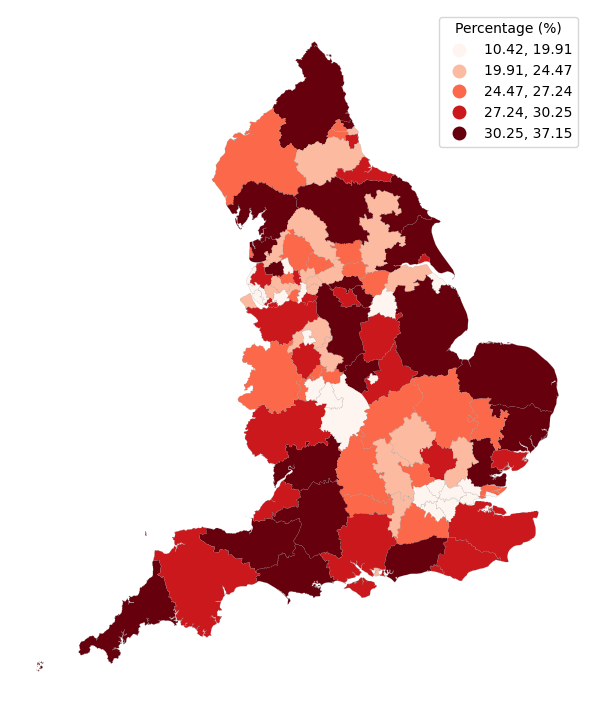

In [26]:
fig, ax = plt.subplots(1, figsize=(9, 9))
dataset_sicb23_geo.plot(column='pct_over14', cmap='Reds', 
        scheme='quantiles', k=5, 
        edgecolor='grey', linewidth=0.1,
        legend=True, legend_kwds={"title":'Percentage (%)',"loc": 'upper right'},
        ax=ax
       )
ax.set_axis_off()
#ax.set_title("Percentage of GP appointments over 14 days wait", fontsize=14)

plt.savefig('GP_Map.png', dpi=300, bbox_inches='tight', facecolor='none')

# Correlations and Linearity

In [27]:
dataset_sicb23[['pct_same_1','pct_over14','pct_28p', 'pct_remote', 'pct_ftof', 'pct_pats_0_4', 'pct_pats_65p', 'pats_per_gp', 'pct_rttwaits_18wks', 'pctpats_depression', 'pctpats_obesity', 'pctpats_hypertension', 'pctpats_copd', 'pctpats_prediabetes', 'pctpats_mh',	'pctpats_diabetes',	'pctpats_asthma']].corr()

,pct_same_1,pct_over14,pct_28p,pct_remote,pct_ftof,pct_pats_0_4,pct_pats_65p,pats_per_gp,pct_rttwaits_18wks,pctpats_depression,pctpats_obesity,pctpats_hypertension,pctpats_copd,pctpats_prediabetes,pctpats_mh,pctpats_diabetes,pctpats_asthma
pct_same_1,1.000000,-0.853639,-0.739436,0.564419,-0.531560,0.328157,-0.516156,0.170430,-0.124508,-0.158350,-0.085017,-0.431180,-0.168330,-0.260255,0.257553,-0.032691,-0.489164
pct_over14,-0.853639,1.000000,0.935985,-0.448512,0.406484,-0.434231,0.660863,-0.240365,0.156646,0.111923,0.070200,0.528279,0.180144,0.307242,-0.344910,0.010690,0.604967
pct_28p,-0.739436,0.935985,1.000000,-0.410702,0.369941,-0.454085,0.663998,-0.266251,0.168374,0.051018,0.044360,0.534559,0.118531,0.269223,-0.371167,0.011732,0.560552
pct_remote,0.564419,-0.448512,-0.410702,1.000000,-0.975200,-0.058384,-0.277307,0.083170,-0.098640,-0.209919,-0.345961,-0.407113,-0.290577,-0.112323,0.175917,-0.399559,-0.407584
pct_ftof,-0.531560,0.406484,0.369941,-0.975200,1.000000,0.088725,0.249915,-0.051422,0.119577,0.218777,0.344192,0.382945,0.260405,0.098171,-0.145084,0.396213,0.362914
pct_pats_0_4,0.328157,-0.434231,-0.454085,-0.058384,0.088725,1.000000,-0.586520,0.251142,-0.199577,0.023835,0.227720,-0.344014,-0.061997,-0.006775,-0.019628,0.371740,-0.263221
pct_pats_65p,-0.516156,0.660863,0.663998,-0.277307,0.249915,-0.586520,1.000000,-0.300321,0.139715,0.294281,0.219160,0.898087,0.390379,0.225728,-0.260135,0.179653,0.733198
pats_per_gp,0.170430,-0.240365,-0.266251,0.083170,-0.051422,0.251142,-0.300321,1.000000,-0.280855,-0.298922,-0.225532,-0.300786,-0.270321,-0.230762,-0.050047,-0.047531,-0.429993
pct_rttwaits_18wks,-0.124508,0.156646,0.168374,-0.098640,0.119577,-0.199577,0.139715,-0.280855,1.000000,0.077945,0.248441,0.166470,0.199638,0.166607,-0.045398,0.086457,0.214143
pctpats_depression,-0.158350,0.111923,0.051018,-0.209919,0.218777,0.023835,0.294281,-0.298922,0.077945,1.000000,0.592550,0.513084,0.675119,0.210675,0.342254,0.348126,0.576556


In [28]:
dataset_sicb23[['pct_over14','pct_remote', 'pct_pats_0_4', 'pct_pats_65p', 'pats_per_gp', 'pct_rttwaits_18wks', 'pctpats_depression', 'pctpats_obesity', 'pctpats_hypertension', 'pctpats_copd', 'pctpats_prediabetes', 'pctpats_mh',	'pctpats_diabetes',	'pctpats_asthma']].corr()

,pct_over14,pct_remote,pct_pats_0_4,pct_pats_65p,pats_per_gp,pct_rttwaits_18wks,pctpats_depression,pctpats_obesity,pctpats_hypertension,pctpats_copd,pctpats_prediabetes,pctpats_mh,pctpats_diabetes,pctpats_asthma
pct_over14,1.000000,-0.448512,-0.434231,0.660863,-0.240365,0.156646,0.111923,0.070200,0.528279,0.180144,0.307242,-0.344910,0.010690,0.604967
pct_remote,-0.448512,1.000000,-0.058384,-0.277307,0.083170,-0.098640,-0.209919,-0.345961,-0.407113,-0.290577,-0.112323,0.175917,-0.399559,-0.407584
pct_pats_0_4,-0.434231,-0.058384,1.000000,-0.586520,0.251142,-0.199577,0.023835,0.227720,-0.344014,-0.061997,-0.006775,-0.019628,0.371740,-0.263221
pct_pats_65p,0.660863,-0.277307,-0.586520,1.000000,-0.300321,0.139715,0.294281,0.219160,0.898087,0.390379,0.225728,-0.260135,0.179653,0.733198
pats_per_gp,-0.240365,0.083170,0.251142,-0.300321,1.000000,-0.280855,-0.298922,-0.225532,-0.300786,-0.270321,-0.230762,-0.050047,-0.047531,-0.429993
pct_rttwaits_18wks,0.156646,-0.098640,-0.199577,0.139715,-0.280855,1.000000,0.077945,0.248441,0.166470,0.199638,0.166607,-0.045398,0.086457,0.214143
pctpats_depression,0.111923,-0.209919,0.023835,0.294281,-0.298922,0.077945,1.000000,0.592550,0.513084,0.675119,0.210675,0.342254,0.348126,0.576556
pctpats_obesity,0.070200,-0.345961,0.227720,0.219160,-0.225532,0.248441,0.592550,1.000000,0.529937,0.760575,0.409579,0.130174,0.742280,0.534261
pctpats_hypertension,0.528279,-0.407113,-0.344014,0.898087,-0.300786,0.166470,0.513084,0.529937,1.000000,0.627357,0.278375,-0.192187,0.471687,0.784959
pctpats_copd,0.180144,-0.290577,-0.061997,0.390379,-0.270321,0.199638,0.675119,0.760575,0.627357,1.000000,0.256331,0.193181,0.535041,0.642815


Scatterplots – checking linearity

There appears to be high multi-collinearity:
- Health conditions (especially copd with depression, obesity, hypertension)
- %Age 65+ with hypertension
- Asthma and Hypertension appears to be the only selected conditions that correlate with waiting 14+ days - and much of this comes from the collinearity with %age 65+.

The most suitable explanatory variables of waits 14+ days to select from these variables appear to be %age 65+, %remote appointments

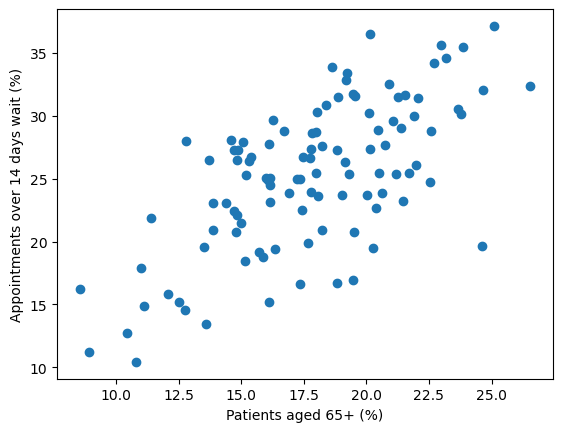

In [29]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pct_pats_65p'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients aged 65+ (%)')
plt.show()

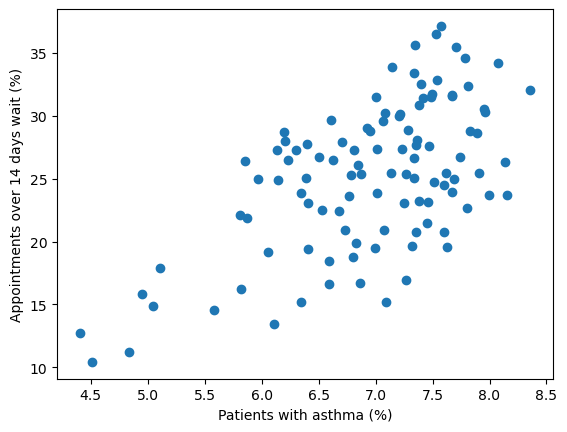

In [30]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pctpats_asthma'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients with asthma (%)')
plt.show()

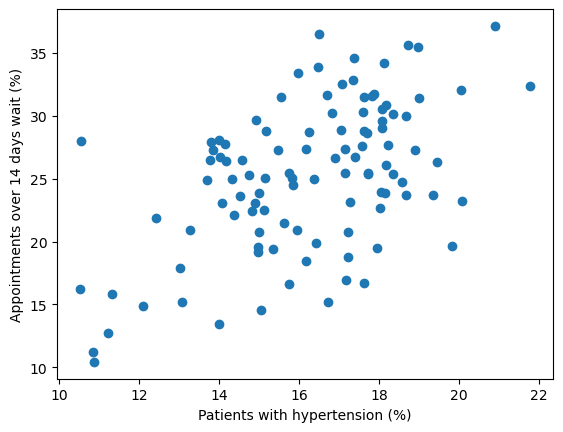

In [31]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pctpats_hypertension'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients with hypertension (%)')
plt.show()

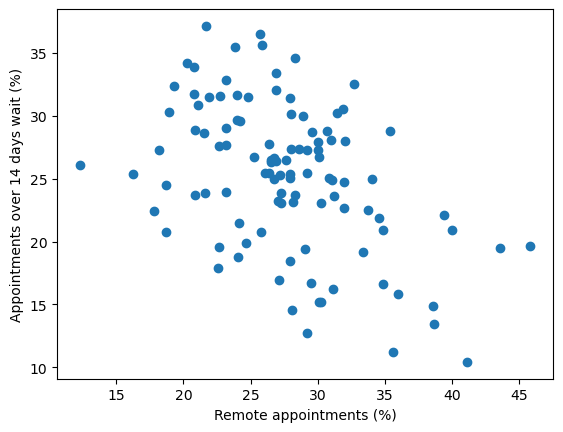

In [32]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pct_remote'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Remote appointments (%)')
plt.show()

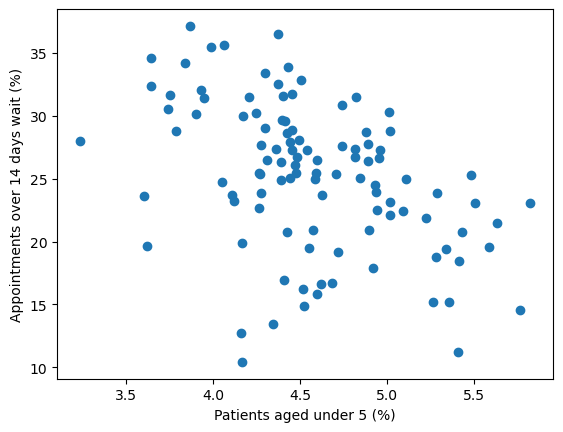

In [33]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pct_pats_0_4'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients aged under 5 (%)')
plt.show()

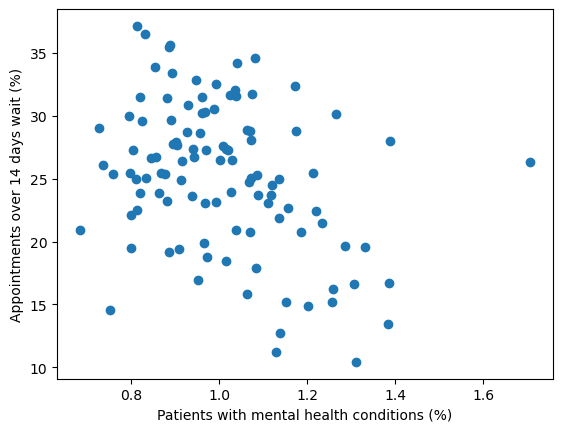

In [34]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pctpats_mh'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients with mental health conditions (%)')
plt.show()

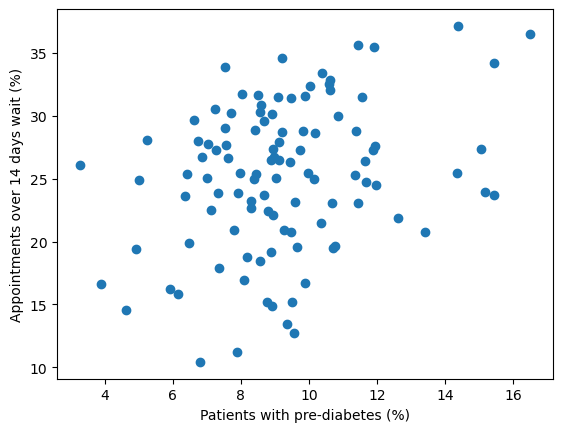

In [35]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pctpats_prediabetes'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients with pre-diabetes (%)')
plt.show()

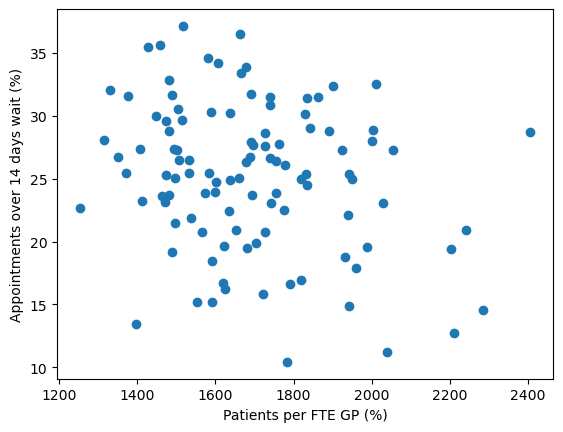

In [36]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pats_per_gp'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients per FTE GP (%)')
plt.show()

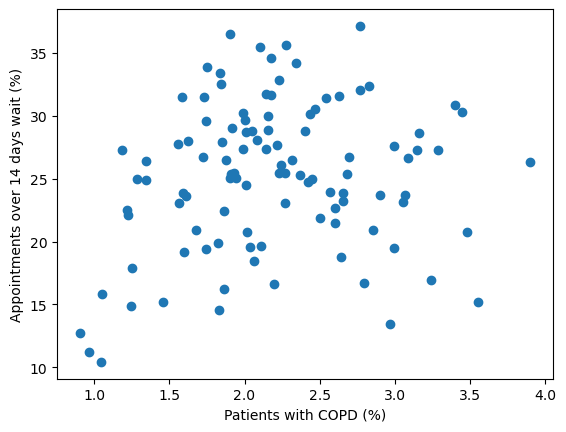

In [37]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pctpats_copd'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients with COPD (%)')
plt.show()

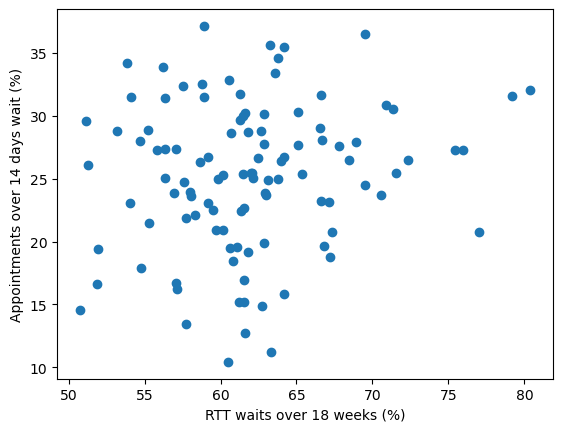

In [38]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pct_rttwaits_18wks'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('RTT waits over 18 weeks (%)')
plt.show()

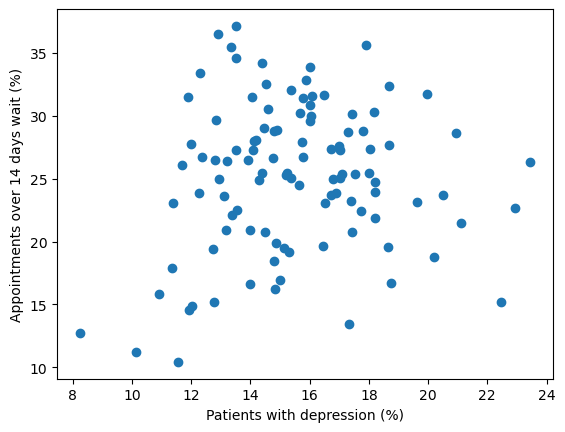

In [39]:
fig, ax = plt.subplots(1)
plt.scatter(dataset_sicb23['pctpats_depression'],dataset_sicb23['pct_over14'])
ax.set_ylabel('Appointments over 14 days wait (%)')
ax.set_xlabel('Patients with depression (%)')
plt.show()

# Univariate Relations - OLS

**Age**

In [40]:
age_mod = smf.ols("pct_over14 ~ pct_pats_65p", data=dataset_sicb23)
age_mod_fit = age_mod.fit()
print(age_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             pct_over14   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     80.64
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           1.27e-14
Time:                        14:05:18   Log-Likelihood:                -307.01
No. Observations:                 106   AIC:                             618.0
Df Residuals:                     104   BIC:                             623.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5778      2.117      3.107   

Text(0, 0.5, 'Count')

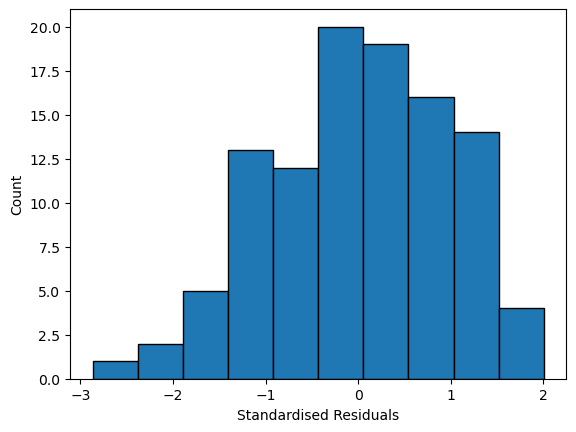

In [41]:
#check model assumptions
plt.hist(age_mod_fit.resid_pearson,
         edgecolor='black')
plt.xlabel('Standardised Residuals')
plt.ylabel('Count')

Text(0, 0.5, 'Standardized Residuals (z)')

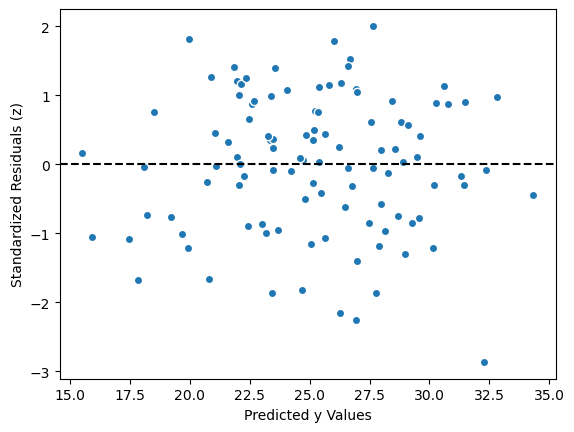

In [42]:
plt.plot(age_mod_fit.fittedvalues, age_mod_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')   

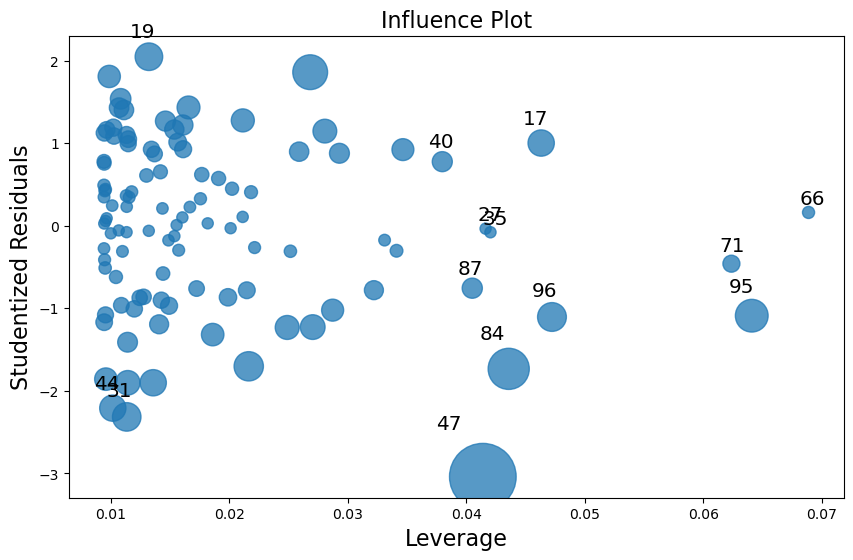

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(age_mod_fit, alpha=0.05, 
                                 criterion="cooks", ax=ax)

**Asthma**

In [44]:
asthma_mod = smf.ols("pct_over14 ~ pctpats_asthma", data=dataset_sicb23)
asthma_mod_fit = asthma_mod.fit()
print(asthma_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             pct_over14   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     60.03
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           6.50e-12
Time:                        14:05:18   Log-Likelihood:                -313.28
No. Observations:                 106   AIC:                             630.6
Df Residuals:                     104   BIC:                             635.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.4096      3.976     -1.

Text(0, 0.5, 'Count')

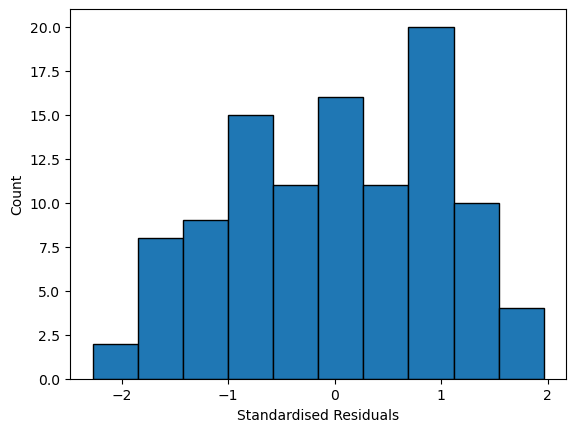

In [45]:
#check model assumptions
plt.hist(asthma_mod_fit.resid_pearson,
         edgecolor='black')
plt.xlabel('Standardised Residuals')
plt.ylabel('Count') 

Text(0, 0.5, 'Standardized Residuals (z)')

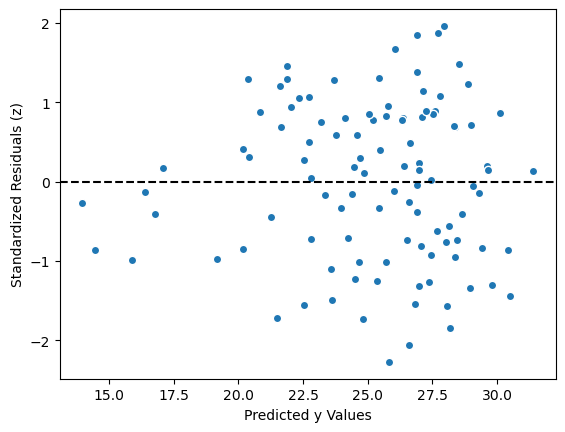

In [46]:
plt.plot(asthma_mod_fit.fittedvalues, asthma_mod_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)') 

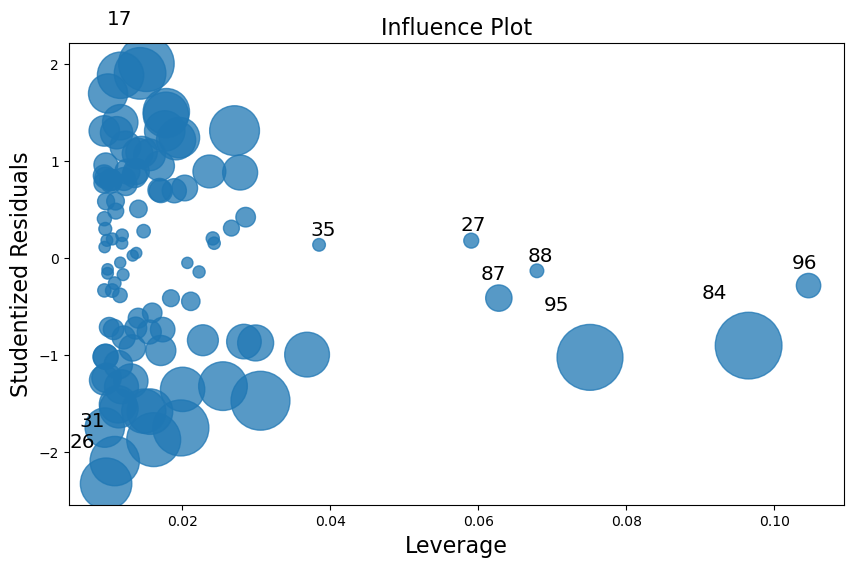

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(asthma_mod_fit, alpha=0.05, 
                                 criterion="cooks", ax=ax)

**Remote Appointments**

In [48]:
remote_mod = smf.ols("pct_over14 ~ pct_remote", data=dataset_sicb23)
remote_mod_fit = remote_mod.fit()
print(remote_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             pct_over14   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     26.19
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           1.42e-06
Time:                        14:05:19   Log-Likelihood:                -325.53
No. Observations:                 106   AIC:                             655.1
Df Residuals:                     104   BIC:                             660.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6604      2.489     15.128      0.0

Text(0, 0.5, 'Count')

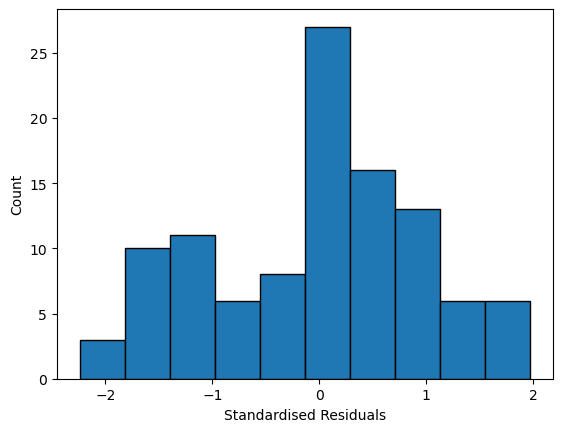

In [49]:
#check model assumptions
plt.hist(remote_mod_fit.resid_pearson,
         edgecolor='black')
plt.xlabel('Standardised Residuals')
plt.ylabel('Count')

Text(0, 0.5, 'Standardized Residuals (z)')

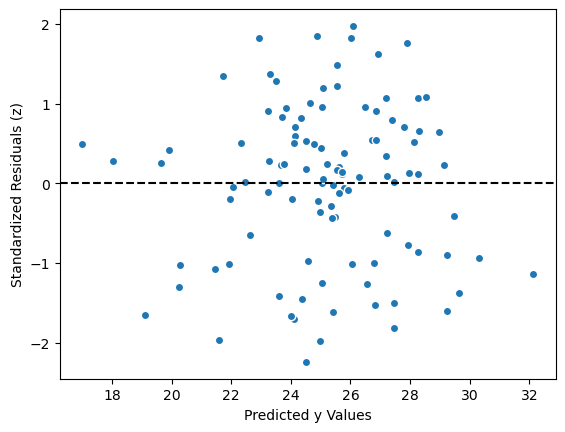

In [50]:
plt.plot(remote_mod_fit.fittedvalues, remote_mod_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')   

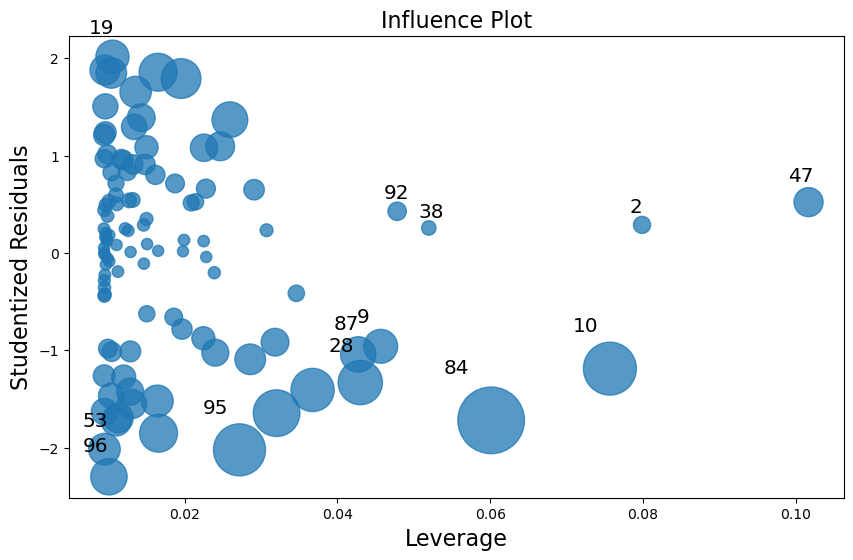

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(remote_mod_fit, alpha=0.05, 
                                 criterion="cooks", ax=ax)

**Hypertension**

In [52]:
hypten_mod = smf.ols("pct_over14 ~ pctpats_hypertension", data=dataset_sicb23)
hypten_mod_fit = hypten_mod.fit()
print(hypten_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             pct_over14   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     40.26
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           5.88e-09
Time:                        14:05:20   Log-Likelihood:                -320.09
No. Observations:                 106   AIC:                             644.2
Df Residuals:                     104   BIC:                             649.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4354 

Text(0, 0.5, 'Count')

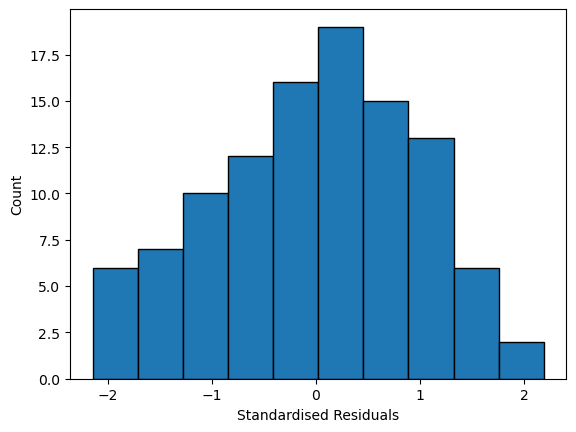

In [53]:
#check model assumptions
plt.hist(hypten_mod_fit.resid_pearson,
         edgecolor='black')
plt.xlabel('Standardised Residuals')
plt.ylabel('Count')

Text(0, 0.5, 'Standardized Residuals (z)')

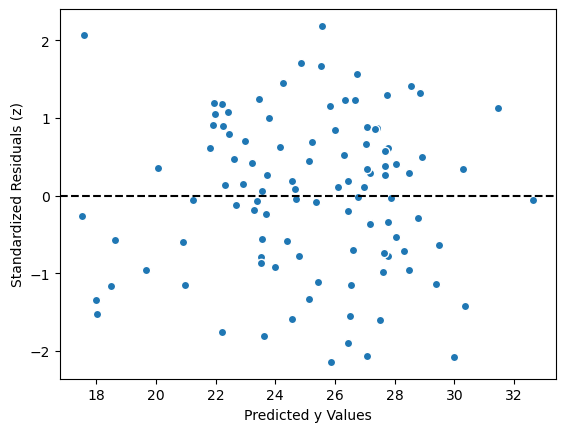

In [54]:
plt.plot(hypten_mod_fit.fittedvalues, hypten_mod_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')   

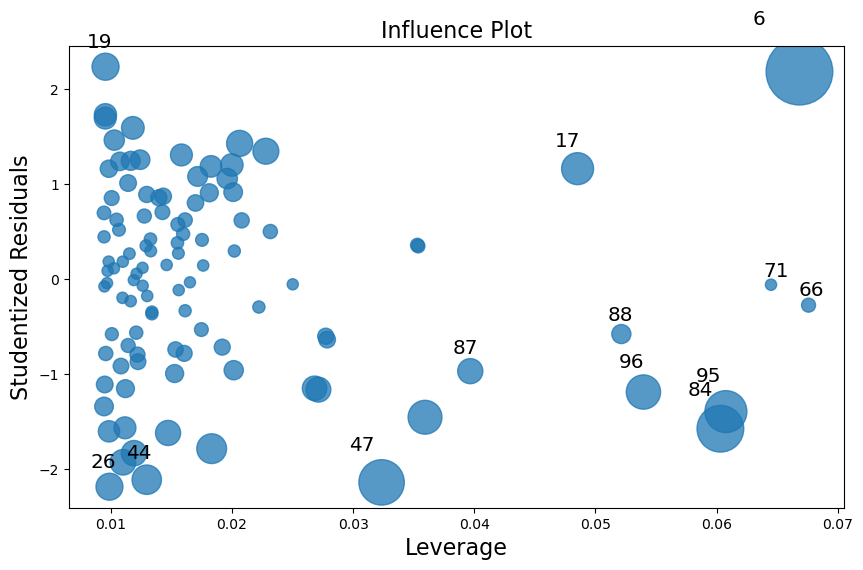

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(hypten_mod_fit, alpha=0.05, 
                                 criterion="cooks", ax=ax)

In [56]:
mh_mod = smf.ols("pct_over14 ~ pctpats_mh", data=dataset_sicb23)
mh_mod_fit = mh_mod.fit()
print(mh_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             pct_over14   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     14.04
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           0.000294
Time:                        14:05:20   Log-Likelihood:                -330.72
No. Observations:                 106   AIC:                             665.4
Df Residuals:                     104   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9639      3.187     11.599      0.0

Text(0, 0.5, 'Standardized Residuals (z)')

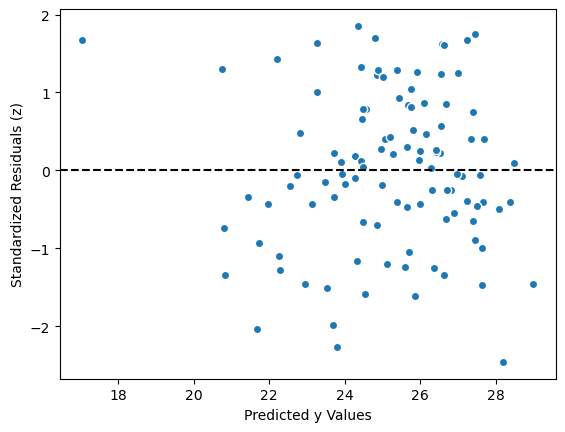

In [57]:
plt.plot(mh_mod_fit.fittedvalues, mh_mod_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')   

In [58]:
ageu5_mod = smf.ols("pct_over14 ~ pct_pats_0_4", data=dataset_sicb23)
ageu5_mod_fit = ageu5_mod.fit()
print(ageu5_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             pct_over14   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     24.17
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           3.31e-06
Time:                        14:05:20   Log-Likelihood:                -326.36
No. Observations:                 106   AIC:                             656.7
Df Residuals:                     104   BIC:                             662.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.7305      4.613     10.346   

Text(0, 0.5, 'Standardized Residuals (z)')

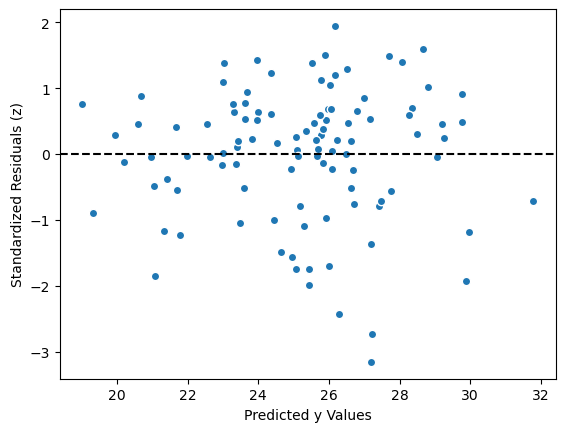

In [59]:
plt.plot(ageu5_mod_fit.fittedvalues, ageu5_mod_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')   

# Multivariate Relations - OLS

Multiple Regression assumptions

In [60]:
X = dataset_sicb23[['pct_pats_65p', 'pct_remote', 'pctpats_asthma', 'pctpats_hypertension']]

vif = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif = pd.DataFrame(vif, columns = ['VIF'])
vif['variable'] = X.columns

print(vif)

          VIF              variable
0  107.525377          pct_pats_65p
1   14.015629            pct_remote
2  153.244426        pctpats_asthma
3  282.638007  pctpats_hypertension


In [61]:
X = dataset_sicb23[['pct_pats_65p', 'pct_remote']]
vif = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif = pd.DataFrame(vif, columns = ['VIF'])
vif['variable'] = X.columns

print(vif)

        VIF      variable
0  9.640328  pct_pats_65p
1  9.640328    pct_remote


**Age + Remote**

In [62]:
age_remote_mod = smf.ols("pct_over14 ~ pct_pats_65p + pct_remote", data=dataset_sicb23)
age_remote_mod_fit = age_remote_mod.fit()
print(age_remote_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             pct_over14   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     54.24
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           8.12e-17
Time:                        14:05:20   Log-Likelihood:                -299.31
No. Observations:                 106   AIC:                             604.6
Df Residuals:                     103   BIC:                             612.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.8098      3.226      5.210   

Text(0, 0.5, 'Standardized Residuals (z)')

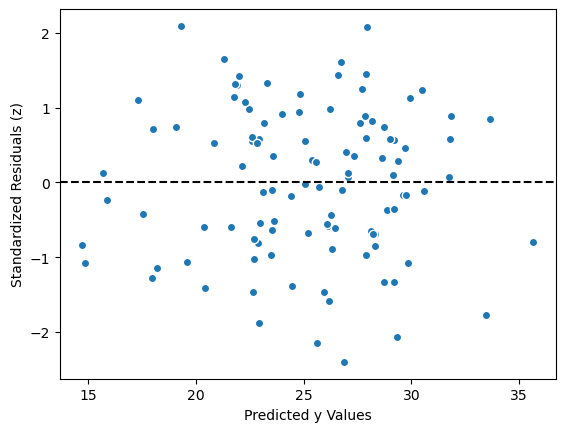

In [63]:
#check model assumptions
plt.plot(age_remote_mod_fit.fittedvalues, age_remote_mod_fit.resid_pearson,
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)') 

# Spatial Regression

**Check Spatial Autocorrelation** in the dependent variable (% appts waiting over 14 days)

In [64]:
wKNN8 = weights.KNN.from_dataframe(dataset_sicb23, k=8)
wKNN8.transform = 'r'

In [65]:
moran = esda.moran.Moran(dataset_sicb23['pct_over14'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.232
0.001


The global spatial correlation is positive, statistically significant, but is only moderate.

**Check Spatial Dependence in the residuals**

In [66]:
#age
age_moran = esda.moran.Moran(age_mod_fit.resid_pearson, 
                                              wKNN8)
print(round(age_moran.I,3))
print(round(age_moran.p_sim,3))

0.193
0.001


In [67]:
#remote
remote_moran = esda.moran.Moran(remote_mod_fit.resid_pearson, 
                                              wKNN8)
print(round(remote_moran.I,3))
print(round(remote_moran.p_sim,3))

0.247
0.001


In [68]:
#age + remote
age_remote_moran = esda.moran.Moran(age_remote_mod_fit.resid_pearson, 
                                              wKNN8)
print(round(age_remote_moran.I,3))
print(round(age_remote_moran.p_sim,3))

0.247
0.001


The residuals have moderate spatial autocorrelation that is statistically significant

### Spatial Lag Model (PySAL)

In [69]:
variable_names=['pct_pats_65p']

age_lagm = spreg.ML_Lag(dataset_sicb23[['pct_over14']].values,
                  dataset_sicb23[variable_names].values,
                  w=wKNN8,
                  name_y='pct_over14',
                  name_x=variable_names)
print(age_lagm.summary)

age_lagm_moran = esda.moran.Moran(age_lagm.u, wKNN8)
print(round(age_lagm_moran.I,3))
print(round(age_lagm_moran.p_sim,3))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  pct_over14                Number of Observations:         106
Mean dependent var  :     25.1929                Number of Variables   :           3
S.D. dependent var  :      5.8659                Degrees of Freedom    :         103
Pseudo R-squared    :      0.4728
Spatial Pseudo R-squared:  0.4173
Log likelihood      :   -304.0240
Sigma-square ML     :     17.9718                Akaike info criterion :     614.048
S.E of regression   :      4.2393                Schwarz criterion     :     622.038

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [70]:
variable_names=['pct_pats_65p', 'pct_remote']

age_remote_lagm = spreg.ML_Lag(dataset_sicb23[['pct_over14']].values,
                  dataset_sicb23[variable_names].values,
                  w=wKNN8,
                  name_y='pct_over14',
                  name_x=variable_names)
print(age_remote_lagm.summary)

age_remote_lagm_moran = esda.moran.Moran(age_remote_lagm.u, wKNN8)
print(round(age_remote_lagm_moran.I,3))
print(round(age_remote_lagm_moran.p_sim,3))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  pct_over14                Number of Observations:         106
Mean dependent var  :     25.1929                Number of Variables   :           4
S.D. dependent var  :      5.8659                Degrees of Freedom    :         102
Pseudo R-squared    :      0.5425
Spatial Pseudo R-squared:  0.4777
Log likelihood      :   -296.4328
Sigma-square ML     :     15.5959                Akaike info criterion :     600.866
S.E of regression   :      3.9492                Schwarz criterion     :     611.519

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

### Spatial Error Model (PySAL)

In [71]:
variable_names=['pct_pats_65p']

age_errm = spreg.ML_Error(dataset_sicb23[['pct_over14']].values,
                  dataset_sicb23[variable_names].values,
                  w=wKNN8,
                  name_y='pct_over14',
                  name_x=variable_names)
print(age_errm.summary)

age_errm_moran = esda.moran.Moran(age_errm.u, wKNN8)
print(round(age_errm_moran.I,3))
print(round(age_errm_moran.p_sim,3))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  pct_over14                Number of Observations:         106
Mean dependent var  :     25.1929                Number of Variables   :           2
S.D. dependent var  :      5.8659                Degrees of Freedom    :         104
Pseudo R-squared    :      0.4367
Log likelihood      :   -301.3535
Sigma-square ML     :     16.7478                Akaike info criterion :     606.707
S.E of regression   :      4.0924                Schwarz criterion     :     612.034

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         6.55452    

In [72]:
variable_names=['pct_pats_65p', 'pct_remote']

age_remote_errm = spreg.ML_Error(dataset_sicb23[['pct_over14']].values,
                  dataset_sicb23[variable_names].values,
                  w=wKNN8,
                  name_y='pct_over14',
                  name_x=variable_names)
print(age_remote_errm.summary)

age_remote_errm_moran = esda.moran.Moran(age_remote_errm.u, wKNN8)
print(round(age_remote_errm_moran.I,3))
print(round(age_remote_errm_moran.p_sim,3))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  pct_over14                Number of Observations:         106
Mean dependent var  :     25.1929                Number of Variables   :           3
S.D. dependent var  :      5.8659                Degrees of Freedom    :         103
Pseudo R-squared    :      0.5119
Log likelihood      :   -290.6049
Sigma-square ML     :     13.5063                Akaike info criterion :     587.210
S.E of regression   :      3.6751                Schwarz criterion     :     595.200

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        18.13632    

## Data Viz

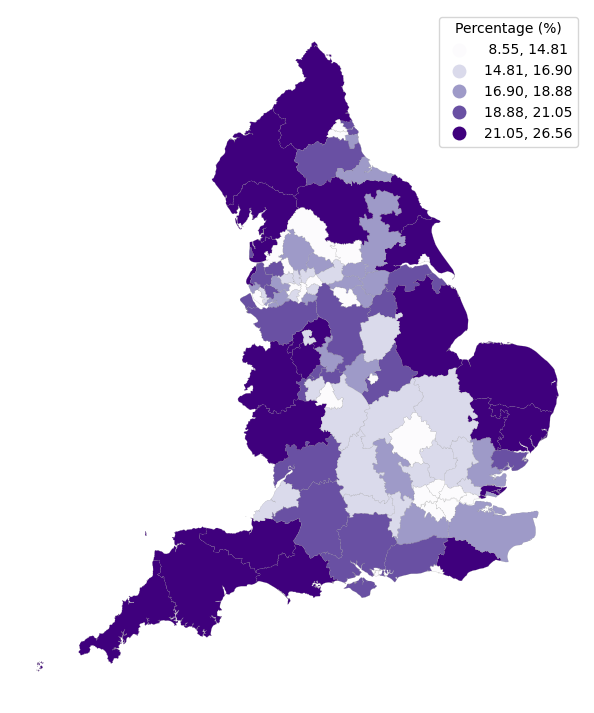

In [73]:
fig, ax = plt.subplots(1, figsize=(9, 9))
dataset_sicb23_geo.plot(column='pct_pats_65p', cmap='Purples', 
        scheme='quantiles', k=5, 
        edgecolor='grey', linewidth=0.1,
        legend=True, legend_kwds={"title":'Percentage (%)',"loc": 'upper right'},
        ax=ax
       )
ax.set_axis_off()
#ax.set_title("Percentage of patients aged 65+", fontsize=14)

plt.savefig('Patients65p_Map.png', dpi=300, bbox_inches='tight', facecolor='none')

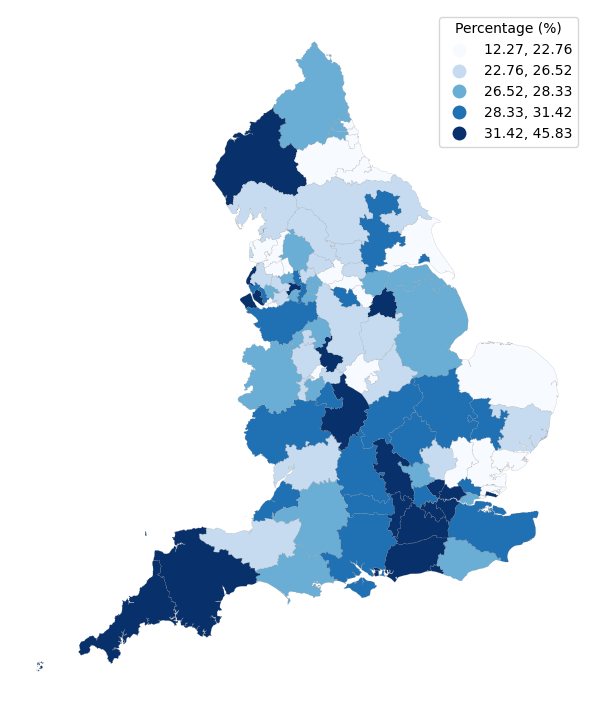

In [74]:
fig, ax = plt.subplots(1, figsize=(9, 9))
dataset_sicb23_geo.plot(column='pct_remote', cmap='Blues', 
        scheme='quantiles', k=5, 
        edgecolor='grey', linewidth=0.1,
        legend=True, legend_kwds={"title":'Percentage (%)',"loc": 'upper right'},
        ax=ax
       )
ax.set_axis_off()
#ax.set_title("Percentage of remote appointments", fontsize=14)

plt.savefig('Remote_Map.png', dpi=300, bbox_inches='tight', facecolor='none')

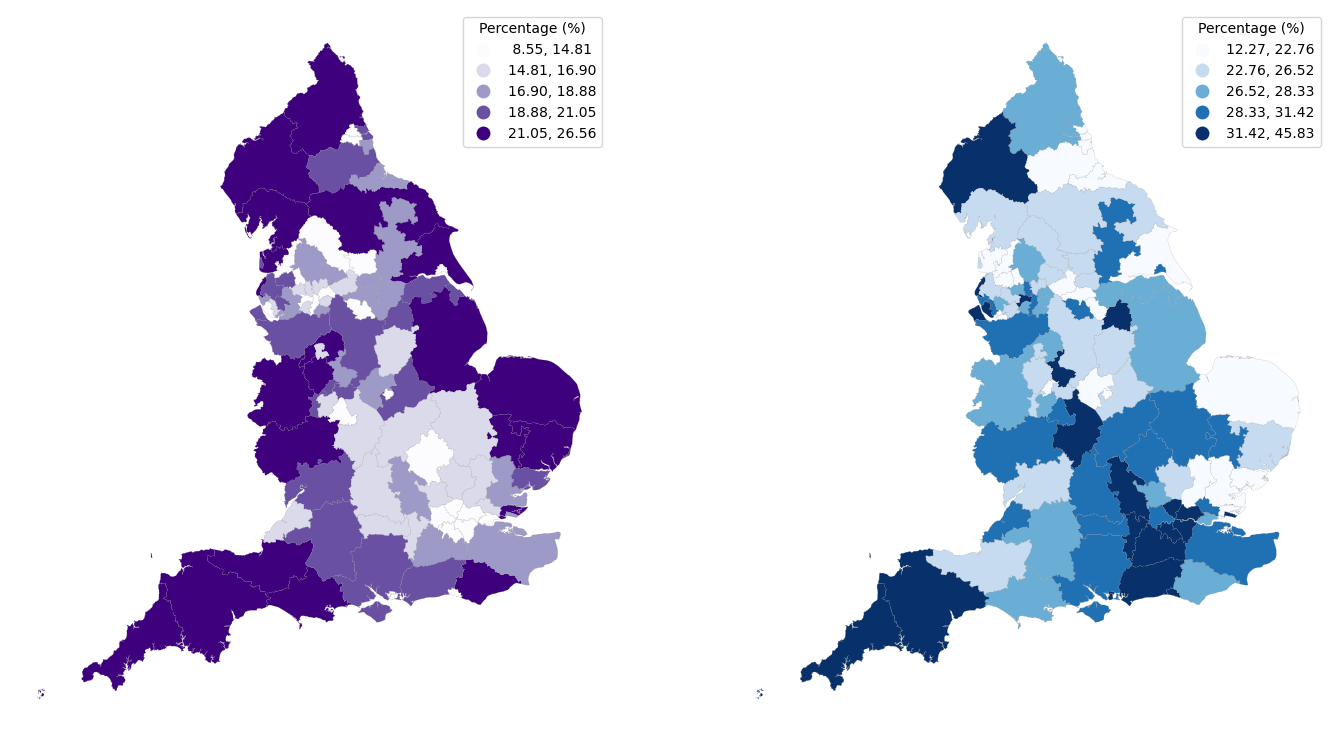

In [106]:
#Choropleths of economically active (employed, unemployed) proportion by LSOA 2021

fig, axs = plt.subplots(1, 2, figsize=(17, 11)) 

dataset_sicb23_geo.plot(column='pct_pats_65p', cmap='Purples', 
        scheme='quantiles', k=5, 
        edgecolor='grey', linewidth=0.1,
        legend=True, legend_kwds={"title":'Percentage (%)',"loc": 'upper right'},
        ax=axs[0]
       )

dataset_sicb23_geo.plot(column='pct_remote', cmap='Blues', 
        scheme='quantiles', k=5, 
        edgecolor='grey', linewidth=0.1,
        legend=True, legend_kwds={"title":'Percentage (%)',"loc": 'upper right'},
        ax=axs[1]
       )

axs[0].axis('off') #don't plot the axes (bounding box)
axs[1].axis('off') #don't plot the axes (bounding box)

#axs[0].set_title('Proportion of Age 65+', fontsize=16)  #axis title
#axs[1].set_title('Proportion of remote', fontsize=16)  #axis title

plt.savefig('Map_age_remote.jpg', dpi=300, bbox_inches='tight', facecolor='white') 

plt.show()

In [75]:
dataset_sicb23['ols_resid'] = age_remote_mod_fit.resid

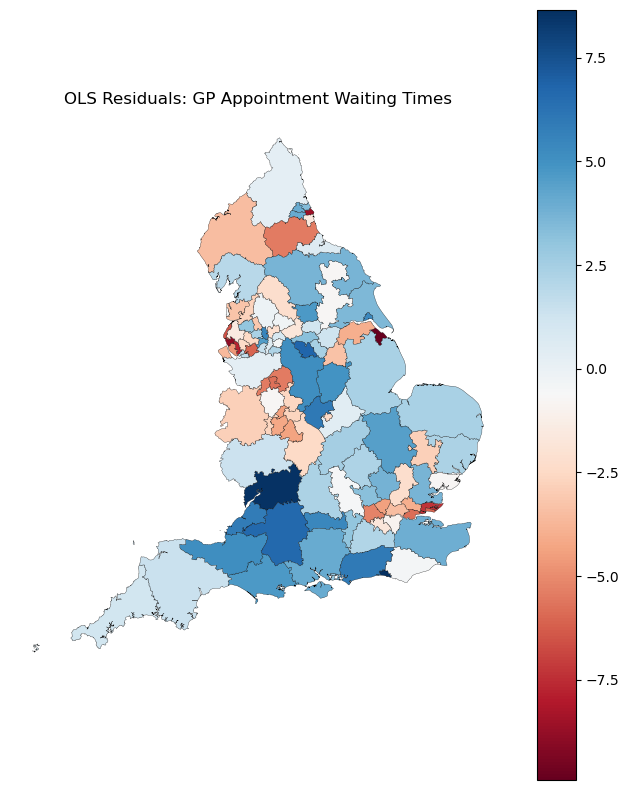

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

dataset_sicb23.plot(
    column='ols_resid',
    cmap='RdBu',
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.2
)

ax.set_title('OLS Residuals: GP Appointment Waiting Times', fontsize=12)
ax.axis('off')

plt.show()

In [89]:
corrmat = dataset_sicb23dataset_sicb23[['pct_over14','pct_remote', 'pct_pats_0_4', 'pct_pats_65p', 'pats_per_gp', 'pct_rttwaits_18wks', 'pctpats_depression', 'pctpats_obesity', 'pctpats_hypertension', 'pctpats_copd', 'pctpats_prediabetes', 'pctpats_mh',	'pctpats_diabetes',	'pctpats_asthma']].corr()

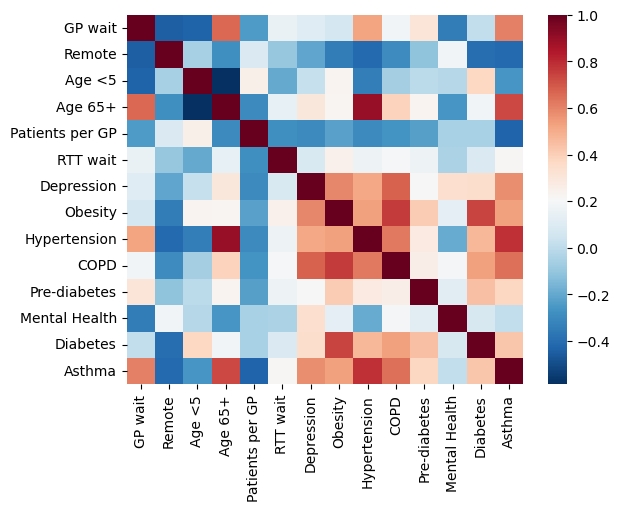

In [93]:
import seaborn as sb             #statistical visualisation

axis_labels = 'GP wait', 'Remote', 'Age <5', 'Age 65+', 'Patients per GP', 'RTT wait', 'Depression', 'Obesity', 'Hypertension', 'COPD', 'Pre-diabetes', 'Mental Health',	'Diabetes',	'Asthma'

#create heatmap of Spearman correlation matrix for economic activity and health variables at LSOA
sb.heatmap(corrmat, cmap='RdBu_r',
          xticklabels=axis_labels, yticklabels=axis_labels)

plt.savefig('GPHeatmap.png', bbox_inches='tight', facecolor='none')
plt.show()

In [102]:
sub = dataset_sicb23[['pct_over14','pct_remote', 'pct_pats_65p', 'pctpats_hypertension', 'pctpats_asthma']]

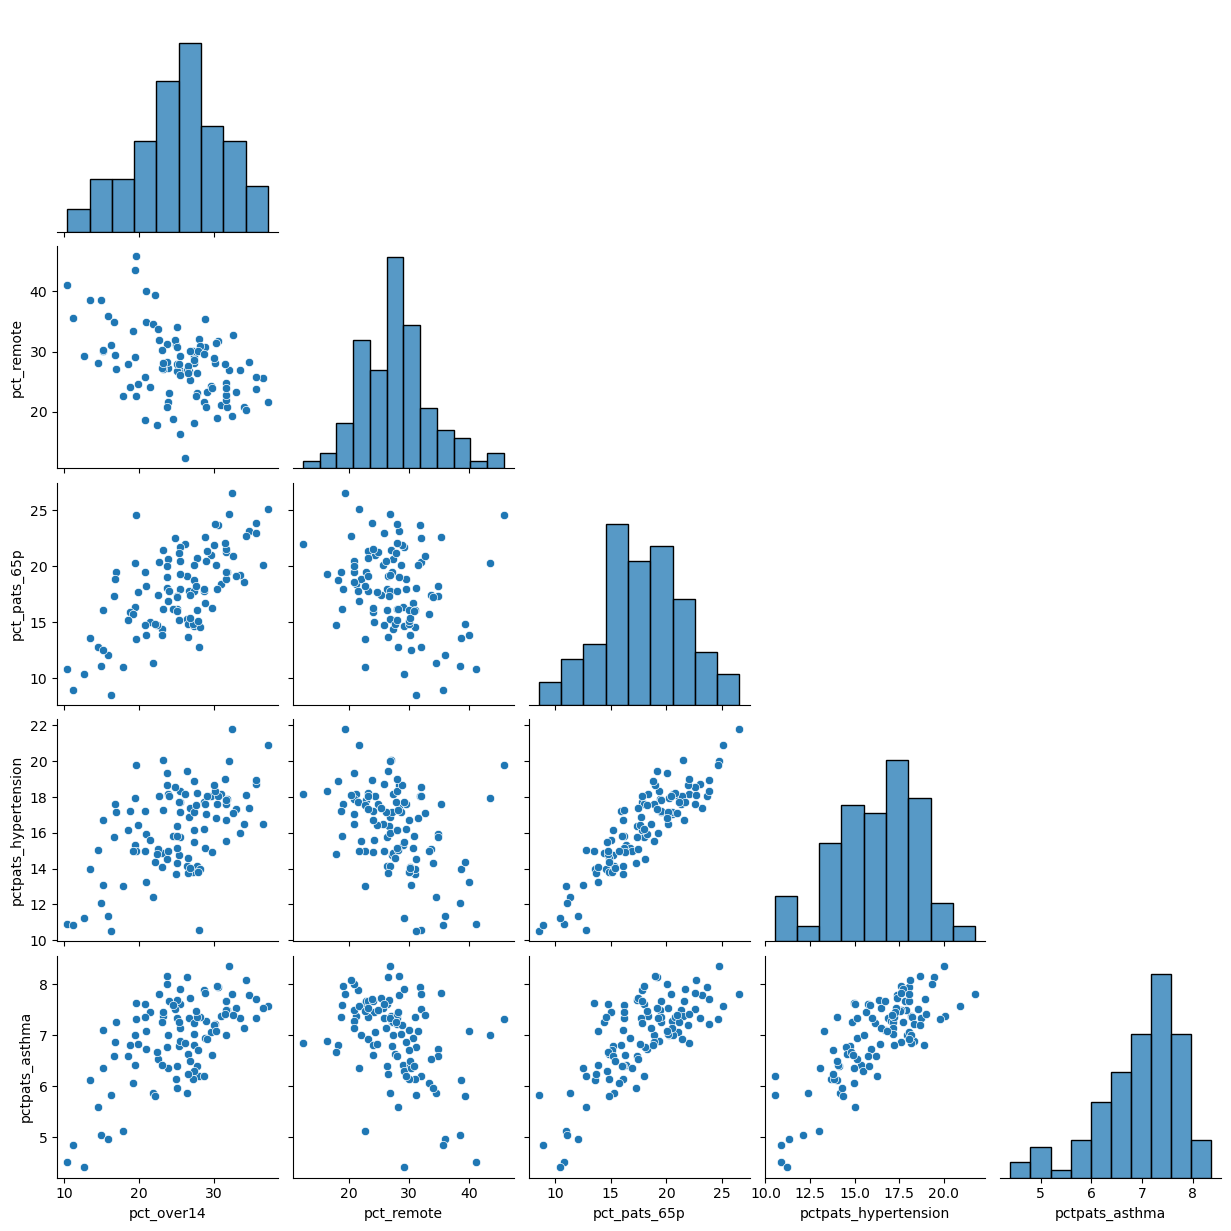

In [103]:
sb.pairplot(sub, corner=True)